In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
# import seaborn as sns

In [2]:
dataset = pd.read_csv('../Dataset/STS/Reduced_STS.csv')
dataset

,Spine abduction-adduction max velocity,Ankle flexo-extension range,Spine abduction-adduction range,Hip flexo-extension max velocity,M_shoulder depth range,Hip flexo-extension range,Spine flexo-extension min velocity,Stand-to-stand time,Spine abduction-adduction min velocity,M_hip depth range,fatigue_level
0,1.28480,1.28480,0.99926,0.99926,0.92684,0.98219,0.98219,1.14940,1.06290,0.96060,1
1,1.13840,1.13840,0.96024,0.96024,0.94873,0.94077,0.94077,1.21500,1.01810,0.89024,1
2,0.96528,0.96528,0.94021,0.94021,0.95089,0.92409,0.92409,1.07120,0.85533,0.95366,1
3,1.41930,1.41930,1.01720,1.01720,0.87146,1.01930,1.01930,1.31060,1.06020,1.10530,2
4,1.16110,1.16110,1.01600,1.01600,0.87461,1.01060,1.01060,1.27670,1.04280,1.15170,2
...,...,...,...,...,...,...,...,...,...,...,...
654,1.42000,1.42000,1.01800,1.01800,0.83422,1.05330,1.05330,0.95064,1.08500,1.10370,3
655,1.48360,1.48360,1.03100,1.03100,0.84454,1.03400,1.03400,0.94578,1.11320,1.10360,3
656,1.00220,1.00970,0.98197,0.96650,0.81455,1.15130,1.15320,1.61660,1.23480,1.00710,3
657,1.62930,1.59150,1.04310,1.05750,0.80206,1.18210,1.17760,1.61810,1.41690,0.50380,3


In [3]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1] - 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = tf.keras.models.load_model('..\Model\STS\FeatureReduced\sts_model_top10')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, y_pred)
cm

array([[31,  1,  0],
       [ 0, 60,  4],
       [ 1, 10, 25]], dtype=int64)

In [18]:
def median_euclidean_distance(data_point, data_set):
    # 确保数据点和数据集是NumPy数组
    data_point = np.array(data_point)
    data_set = np.array(data_set)

    # 计算数据集中每个特征的中位数
    medians = np.median(data_set, axis=0)

    # 计算数据点与中位数之间的欧氏距离
    distance = np.sqrt(np.sum((data_point - medians) ** 2))

    return distance

In [4]:
high_medium_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true == 2 and pred == 1]
high_medium_features = X.iloc[high_medium_indices, :]
high_medium_features

,Spine abduction-adduction max velocity,Ankle flexo-extension range,Spine abduction-adduction range,Hip flexo-extension max velocity,M_shoulder depth range,Hip flexo-extension range,Spine flexo-extension min velocity,Stand-to-stand time,Spine abduction-adduction min velocity,M_hip depth range
12,1.1564,1.1564,0.66097,0.66097,0.78686,1.20520,1.20520,1.3050,1.2545,1.2866
14,1.4214,1.4214,0.85836,0.85836,0.79349,1.21210,1.21210,1.3375,1.2367,1.0457
31,1.2665,1.2665,1.04580,1.04580,0.81767,1.10640,1.10640,1.3997,1.1346,1.0157
49,1.3565,1.3565,1.03430,1.03430,0.79461,1.16600,1.16600,1.0351,1.1819,1.1529
74,1.1068,1.1068,0.97276,0.97276,0.91288,0.99207,0.99207,1.1975,1.0763,1.0013
89,1.2183,1.2183,0.68698,0.68698,0.78222,1.21730,1.21730,1.2159,1.2551,1.1419
95,1.0652,1.0652,0.65936,0.65936,0.88757,1.02640,1.02640,1.2100,1.0488,1.0689
101,1.4169,1.4169,0.89046,0.89046,0.75942,1.23470,1.23470,1.2363,1.3055,1.3163
124,1.2247,1.2247,1.05980,1.05980,0.86950,1.07640,1.07640,1.2033,1.1029,1.0337
131,1.8603,1.8603,1.14080,1.14080,0.81740,1.11920,1.11920,1.4450,1.1993,1.2216


In [ ]:
# subdataset with high fatigue level
high_dataset = 

In [19]:
# Dataset mean Euclidean distance except high_medium_indices
euclidean_dis_norm_mean = 0
for i in range(len(X)):
    if i not in high_medium_indices:
        euclidean_dis_norm_mean += median_euclidean_distance(X.iloc[i, :], X)
euclidean_dis_norm_mean /= len(X) - len(high_medium_indices)
print(euclidean_dis_norm_mean)

0.4649960074237154


In [20]:
euclidean_dis = []
for i in range(len(high_medium_indices)):
    euclidean_dis.append(median_euclidean_distance(high_medium_features.iloc[i, :], X))

print(euclidean_dis)

[0.5971899984092165, 0.3088123787998142, 0.20176664268406713, 0.29790141741858156, 0.3651674131134923, 0.5031445508002645, 0.5973655267087313, 0.42157130239142226, 0.21037125896851985, 0.826532853914471]


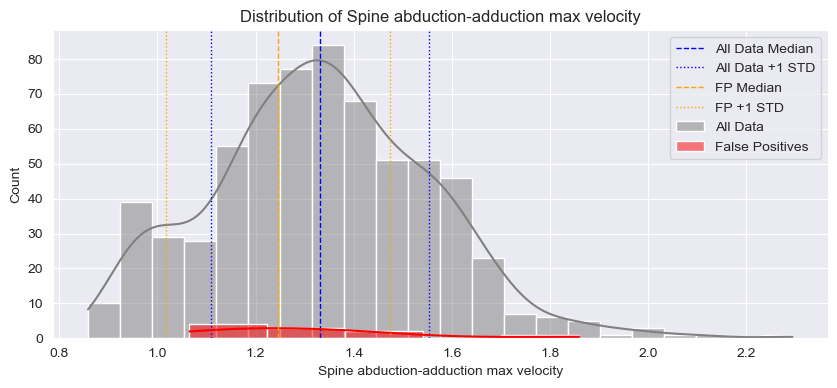

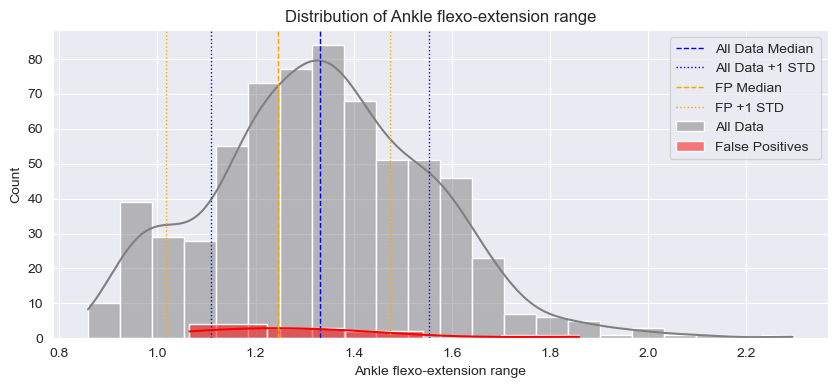

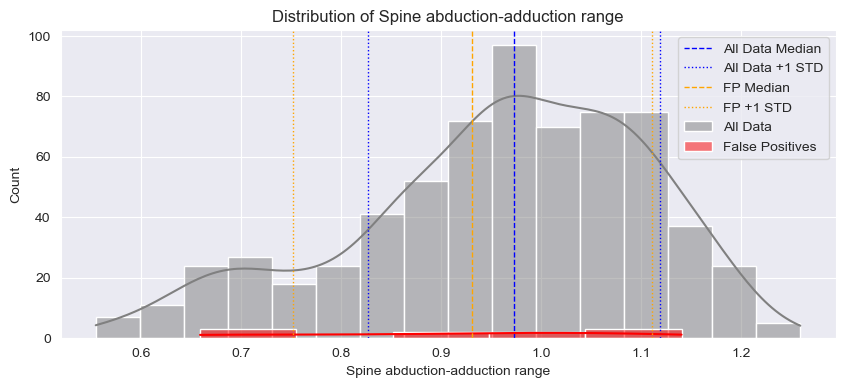

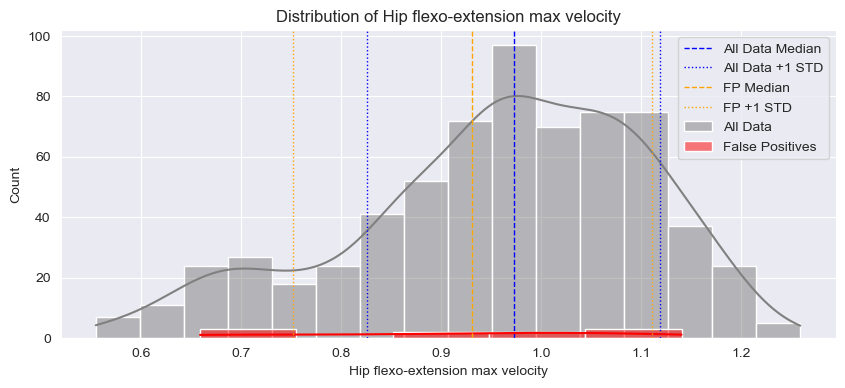

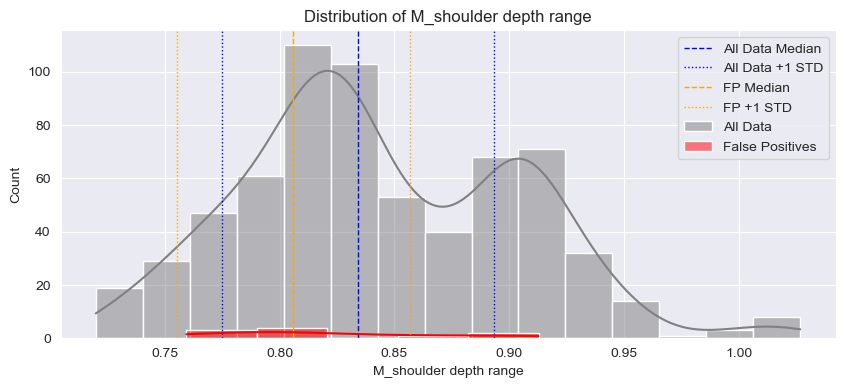

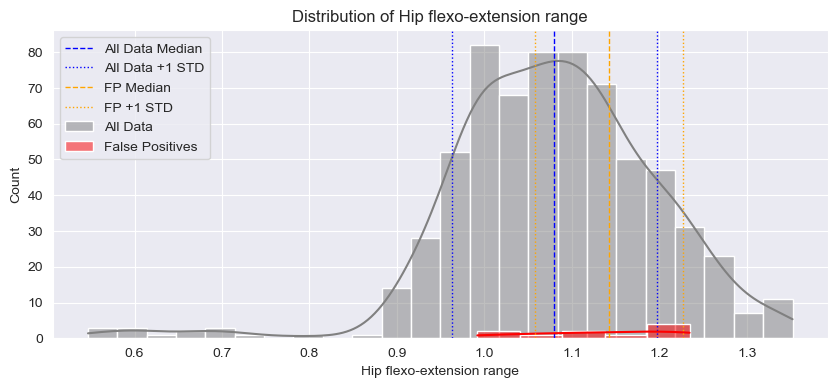

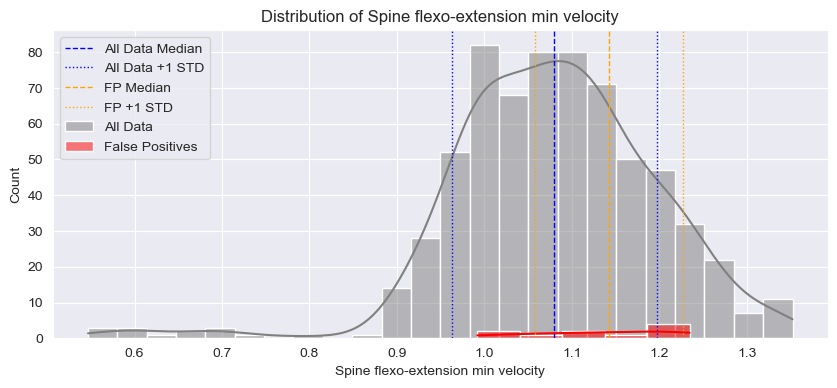

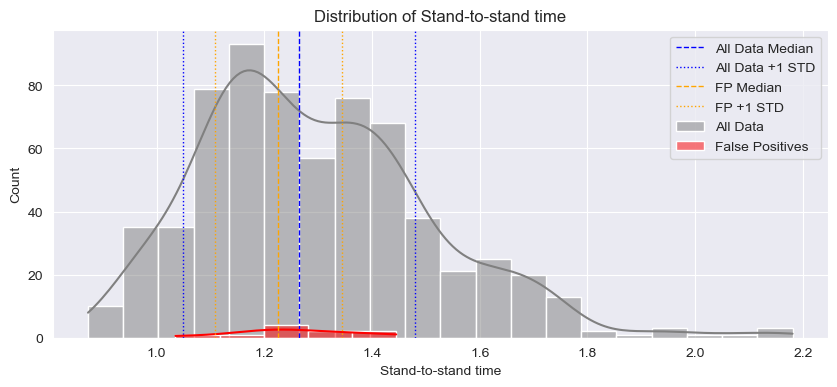

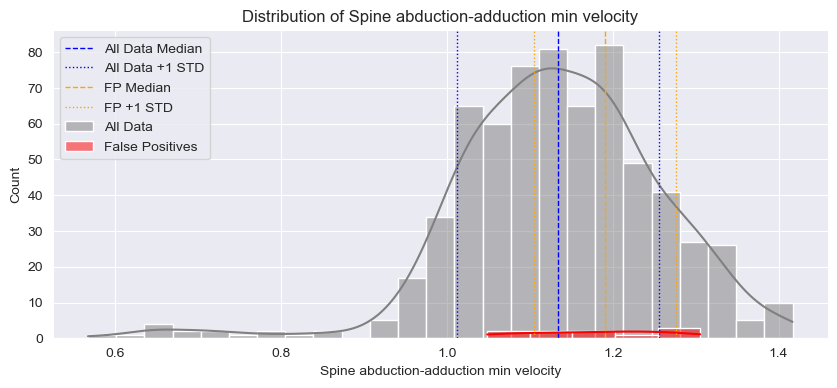

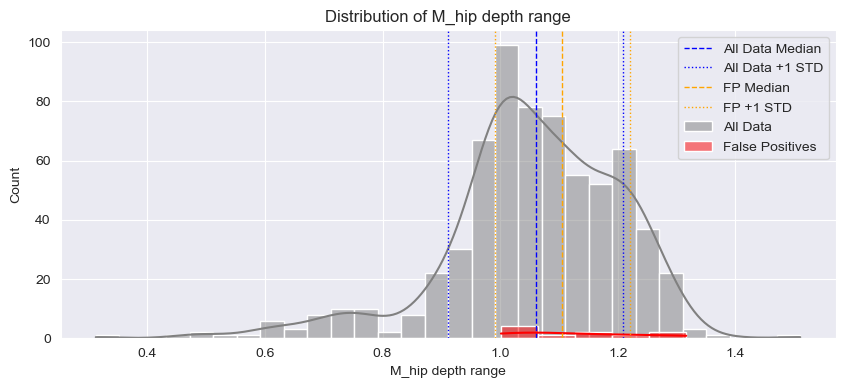

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
# 对每个特征绘制直方图
import seaborn as sns

# 绘制直方图，并在上面标注中位数和一个标准差
for feature in X.columns:
    plt.figure(figsize=(10, 4))

    # 绘制整个数据集的该特征的分布
    sns.histplot(X[feature], color="grey", label="All Data", kde=True)
    # 标注整个数据集的中位数和标准差
    all_median = X[feature].median()
    all_std = X[feature].std()
    plt.axvline(all_median, color='blue', linestyle='dashed', linewidth=1, label='All Data Median')
    plt.axvline(all_median + all_std, color='blue', linestyle='dotted', linewidth=1, label='All Data +1 STD')
    plt.axvline(all_median - all_std, color='blue', linestyle='dotted', linewidth=1)

    # 绘制false positives的分布
    sns.histplot(high_medium_features[feature], color="red", label="False Positives", kde=True)
    # 标注false positives的中位数和标准差
    fp_median = high_medium_features[feature].median()
    fp_std = high_medium_features[feature].std()
    plt.axvline(fp_median, color='orange', linestyle='dashed', linewidth=1, label='FP Median')
    plt.axvline(fp_median + fp_std, color='orange', linestyle='dotted', linewidth=1, label='FP +1 STD')
    plt.axvline(fp_median - fp_std, color='orange', linestyle='dotted', linewidth=1)

    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()



In [6]:
high_low_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true == 2 and pred == 0]
high_low_features = X.iloc[high_low_indices, :]
high_low_features

,Spine abduction-adduction max velocity,Ankle flexo-extension range,Spine abduction-adduction range,Hip flexo-extension max velocity,M_shoulder depth range,Hip flexo-extension range,Spine flexo-extension min velocity,Stand-to-stand time,Spine abduction-adduction min velocity,M_hip depth range
90,1.0024,1.0024,0.98638,0.98638,0.77373,1.2256,1.2256,1.1058,1.3193,1.2521


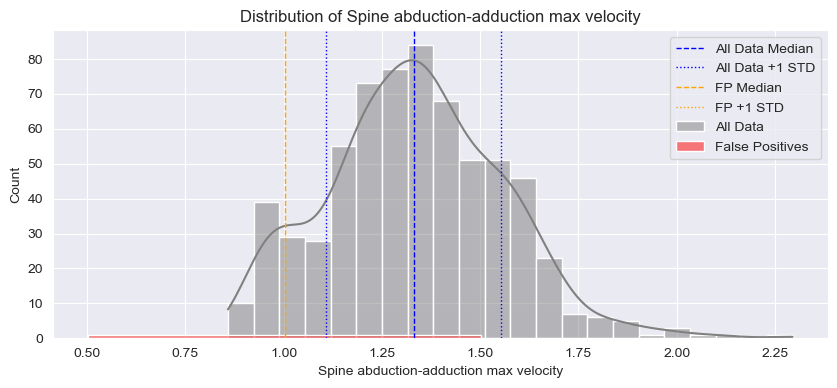

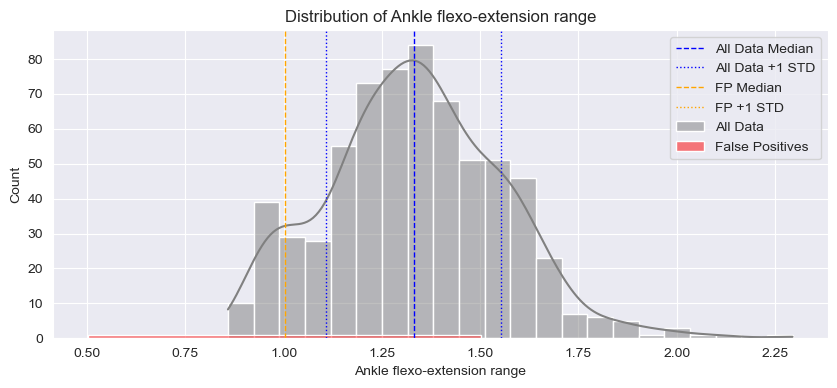

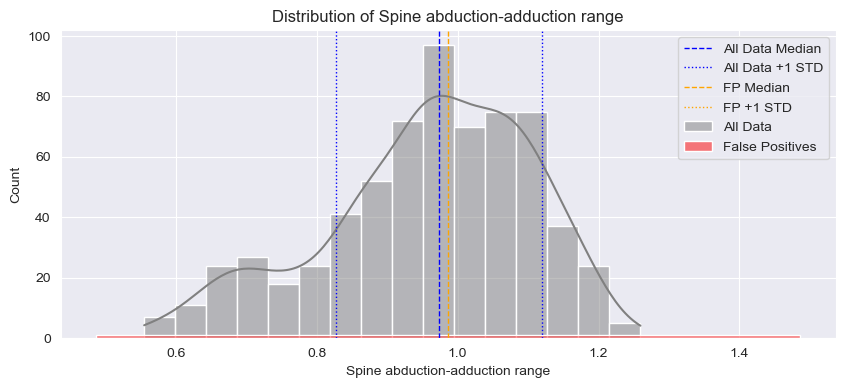

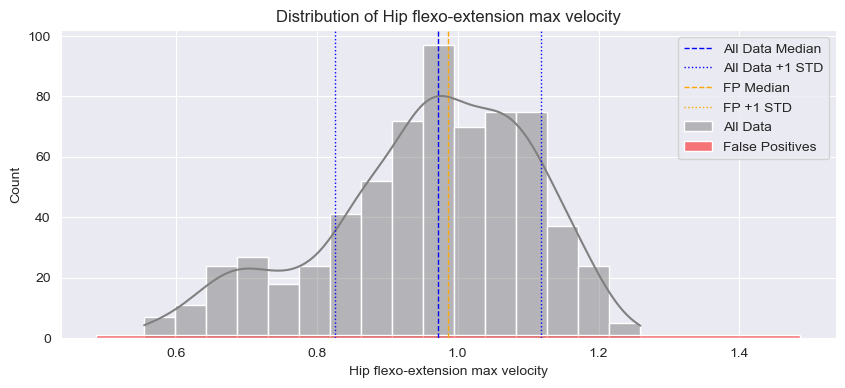

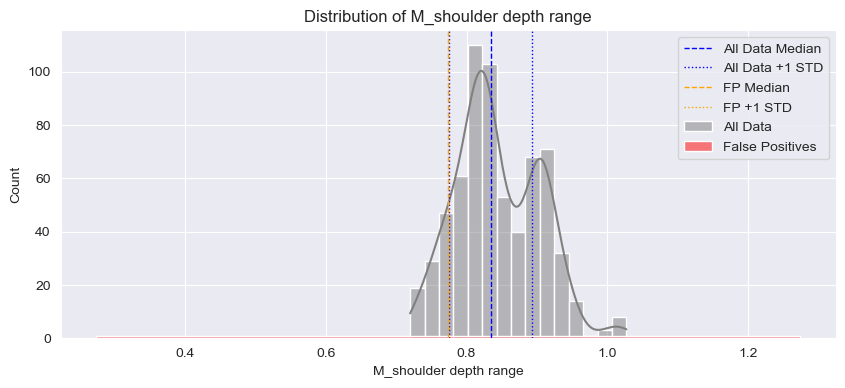

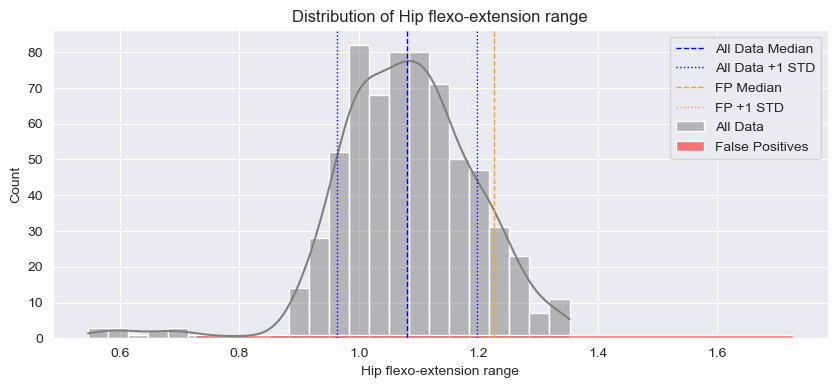

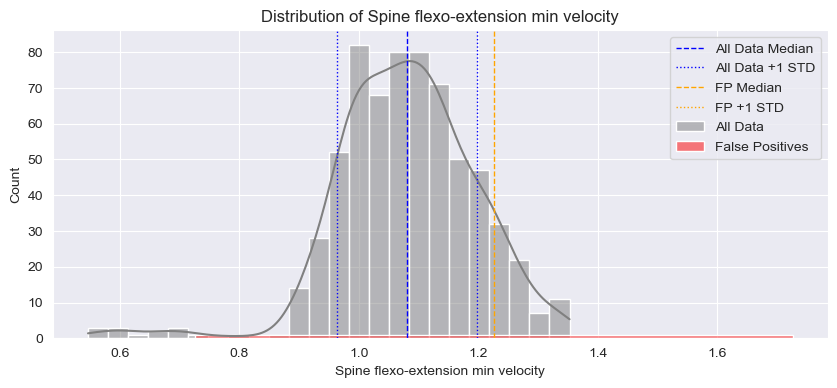

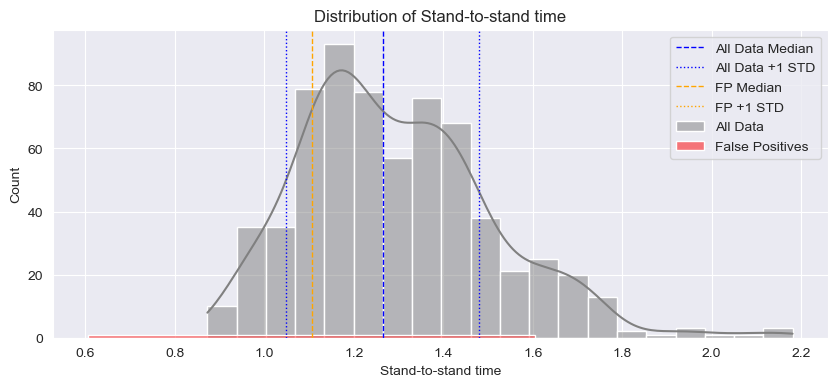

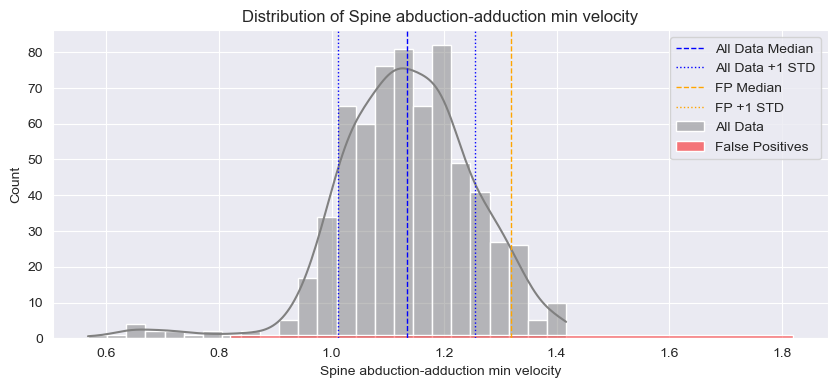

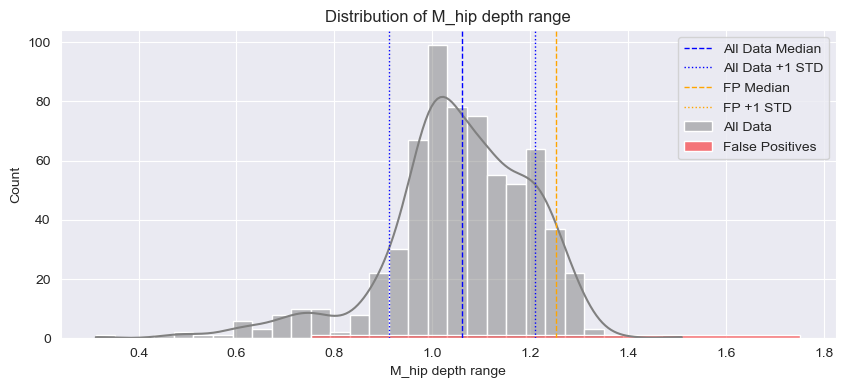

In [7]:
for feature in X.columns:
    plt.figure(figsize=(10, 4))

    # 绘制整个数据集的该特征的分布
    sns.histplot(X[feature], color="grey", label="All Data", kde=True)
    # 标注整个数据集的中位数和标准差
    all_median = X[feature].median()
    all_std = X[feature].std()
    plt.axvline(all_median, color='blue', linestyle='dashed', linewidth=1, label='All Data Median')
    plt.axvline(all_median + all_std, color='blue', linestyle='dotted', linewidth=1, label='All Data +1 STD')
    plt.axvline(all_median - all_std, color='blue', linestyle='dotted', linewidth=1)

    # 绘制false positives的分布
    sns.histplot(high_low_features[feature], color="red", label="False Positives", kde=True)
    # 标注false positives的中位数和标准差
    fp_median = high_low_features[feature].median()
    fp_std = high_low_features[feature].std()
    plt.axvline(fp_median, color='orange', linestyle='dashed', linewidth=1, label='FP Median')
    plt.axvline(fp_median + fp_std, color='orange', linestyle='dotted', linewidth=1, label='FP +1 STD')
    plt.axvline(fp_median - fp_std, color='orange', linestyle='dotted', linewidth=1)

    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()